Ashwin Ravi

CSE-A

3122 21 5001 014

# A3-Handwritten Character Recognition using Neural Networks

In [3]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\english.csv
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-001.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-002.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-003.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-004.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-005.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-006.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-007.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-008.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-009.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-010.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-011.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-012.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-013.png
C:/Users/ashwi/Downloads/ML Lab/A3_Final/Input\Img\img001-014.png
C:/Users/ashwi/Do

C:\Users\ashwi\AppData\Local\Temp\ipykernel_18200\19764463.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Learning Objective
This dataset contains 3,410 images of handwritten characters in English. This is a
classification dataset that can be used for Computer Vision tasks. It contains 62 classes with
55 images of each class. The 62 classes are 0-9, A-Z and a-z.

Develop a python program to recognize handwritten characters using Neural Network (NN) 
Model. Visualize the features from the dataset and interpret the results obtained by the model
using Matplotlib library.

**Import the libraries**

In [4]:
import pandas
import random
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt

# Split the dataset
In this step, we'll split the data into 3 datasets - training set, validation test and test set
Out of total 3410 images, 2910 to training set, 490 added to validation set, 5 to test set
Removed the images added to validation, test set from training set to test its accuracy

In [5]:
data_path = r"C:\Users\ashwi\Downloads\ML Lab\A3_Final\Input"

dataset = pandas.read_csv(data_path + '/english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pandas.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 12)
test_set = pandas.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)

print(test_set)

                 image label
0   Img/img008-031.png     7
1   Img/img057-038.png     u
2   Img/img055-033.png     s
3   Img/img025-051.png     O
4   Img/img013-003.png     C
5   Img/img003-049.png     2
6   Img/img028-047.png     R
7   Img/img061-030.png     y
8   Img/img013-015.png     C
9   Img/img011-022.png     A
10  Img/img009-009.png     8
11  Img/img046-026.png     j


# Data preprocessing
Now that the data is split, lets start with preprocessing step

Load the images through **flow_from_dataframe** method
This method is convinient since the data file (english.csv) contains the image names along with the classification class details

In [6]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 488 validated image filenames belonging to 62 classes.
Found 12 validated image filenames belonging to 11 classes.


# Building the CNN model
We are about to build CNN model using libraries provided through **TensorFlow**

Code block breakdown:
* Create Convolution layer: to read/process the image, one feature or one part at a time
* Create Pooling layer: used to reduce the spatial size of convolved image
* Create Flattening layer: used to flatten the result, whose output would be the input for the neural network 

We can create multiple convolution and pooling layer depending upon the need/complexity of the dataset

In [7]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

# Building, compiling and training the neural network

From the above step we have received the flattened matrix of the images that we processed
We are going to feed it to our neural network and train it

In this section, created fully connected Neural network aka Dense network, chosen sigmoid function for activation type
In below the model will learn from the training set and predicts the data from validation set

The model accuracy improves as the epochs iteration progresses

In [ ]:
# add full connection, output layer
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

# Predicting the testset images

Since the model is trained, lets pass the testset images and see how well our model predicts
class_indices function gives us the neural network mapping for our 62 characters

The result image's name is the predicted character by our model

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
1/1 [==============================] - 0s 388ms/step
Max index:  [33, 40, 20, 26, 26, 24, 26, 26, 26, 41, 26, 26]


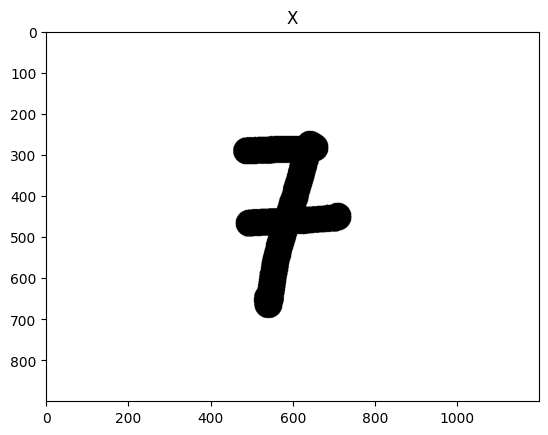

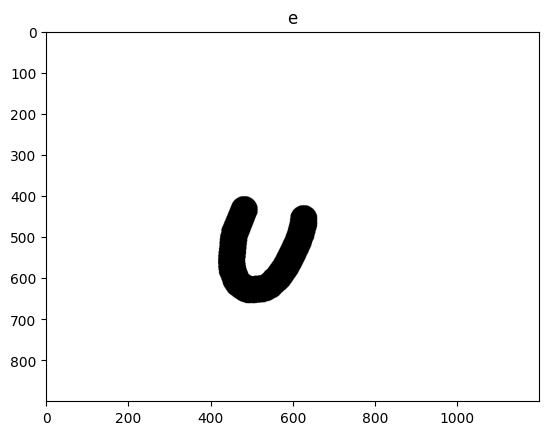

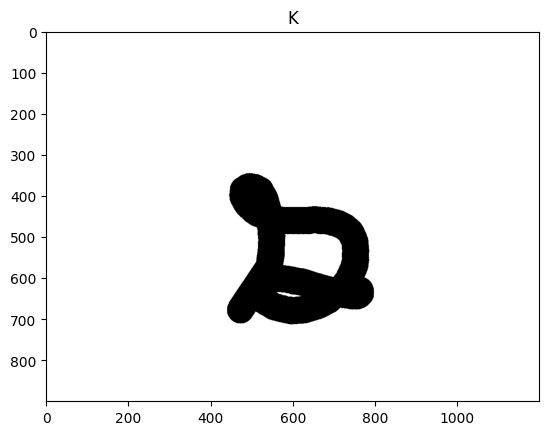

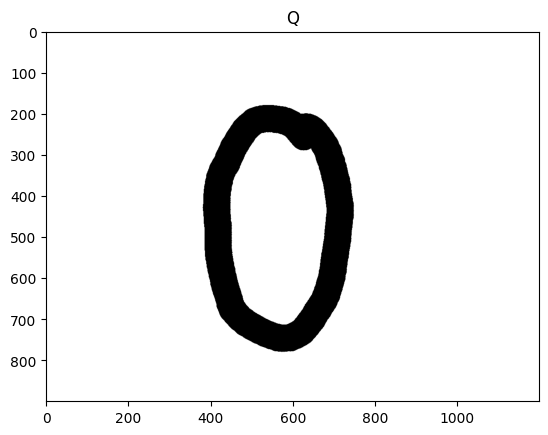

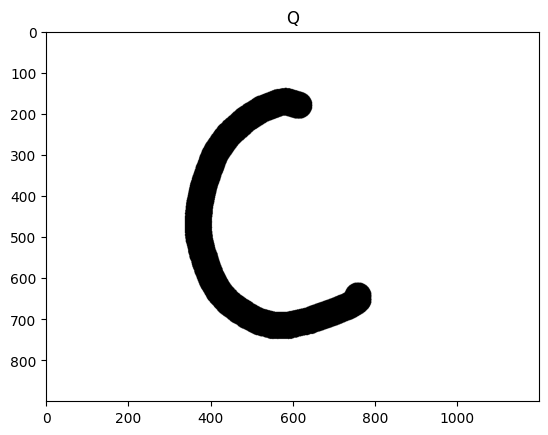

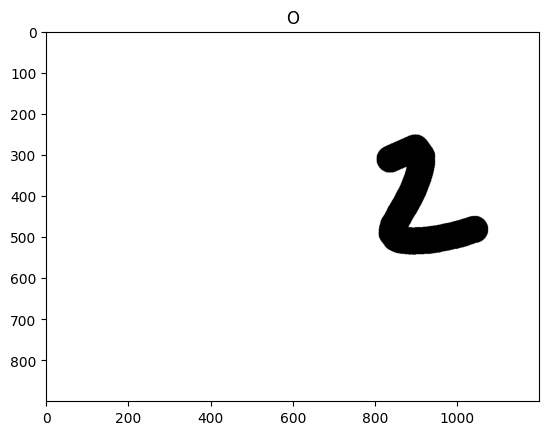

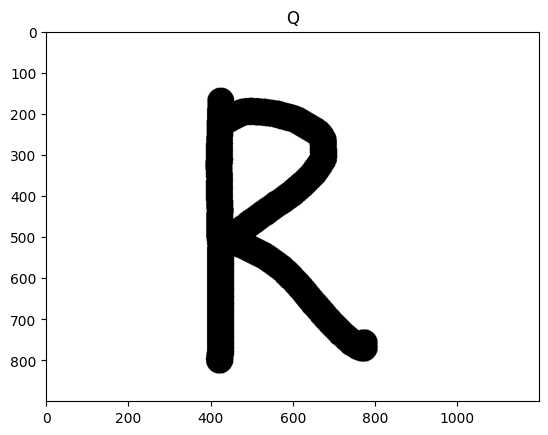

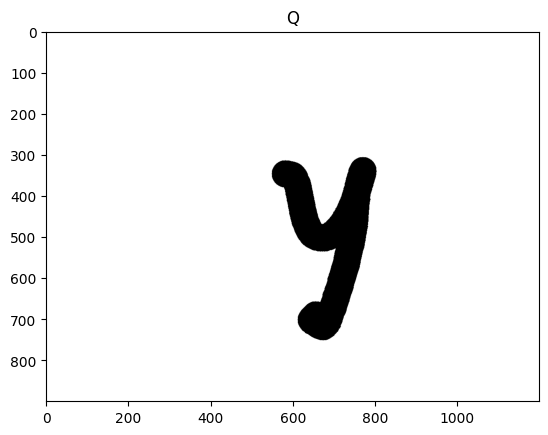

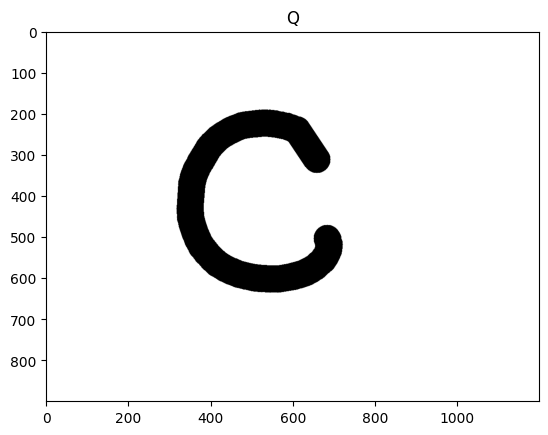

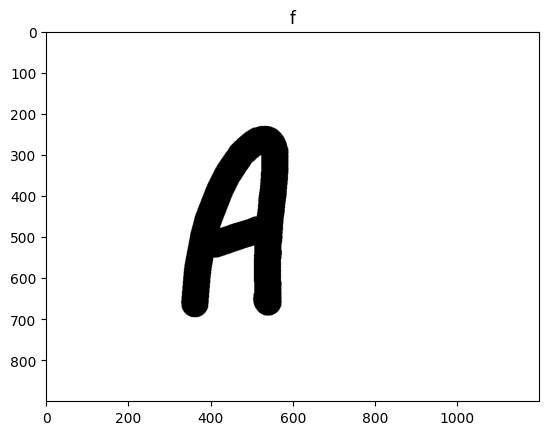

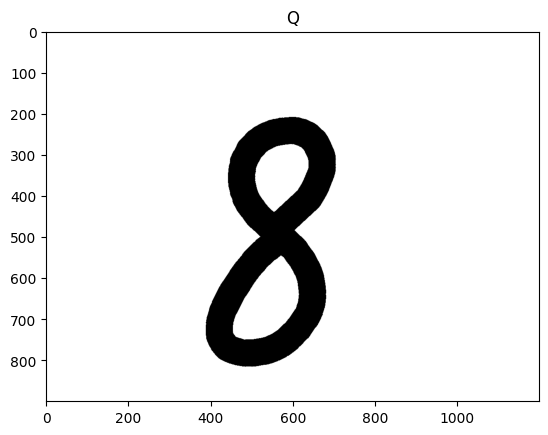

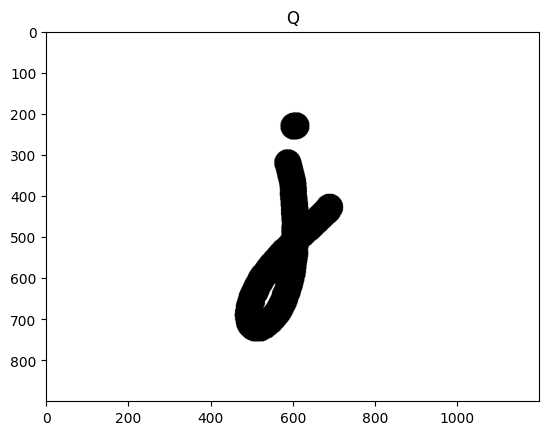

In [9]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pandas.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(data_path + '/' + test_set.at[i, 'image'])
    plt.title(switcher.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

1/1 [==============================] - 0s 338ms/step


C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\

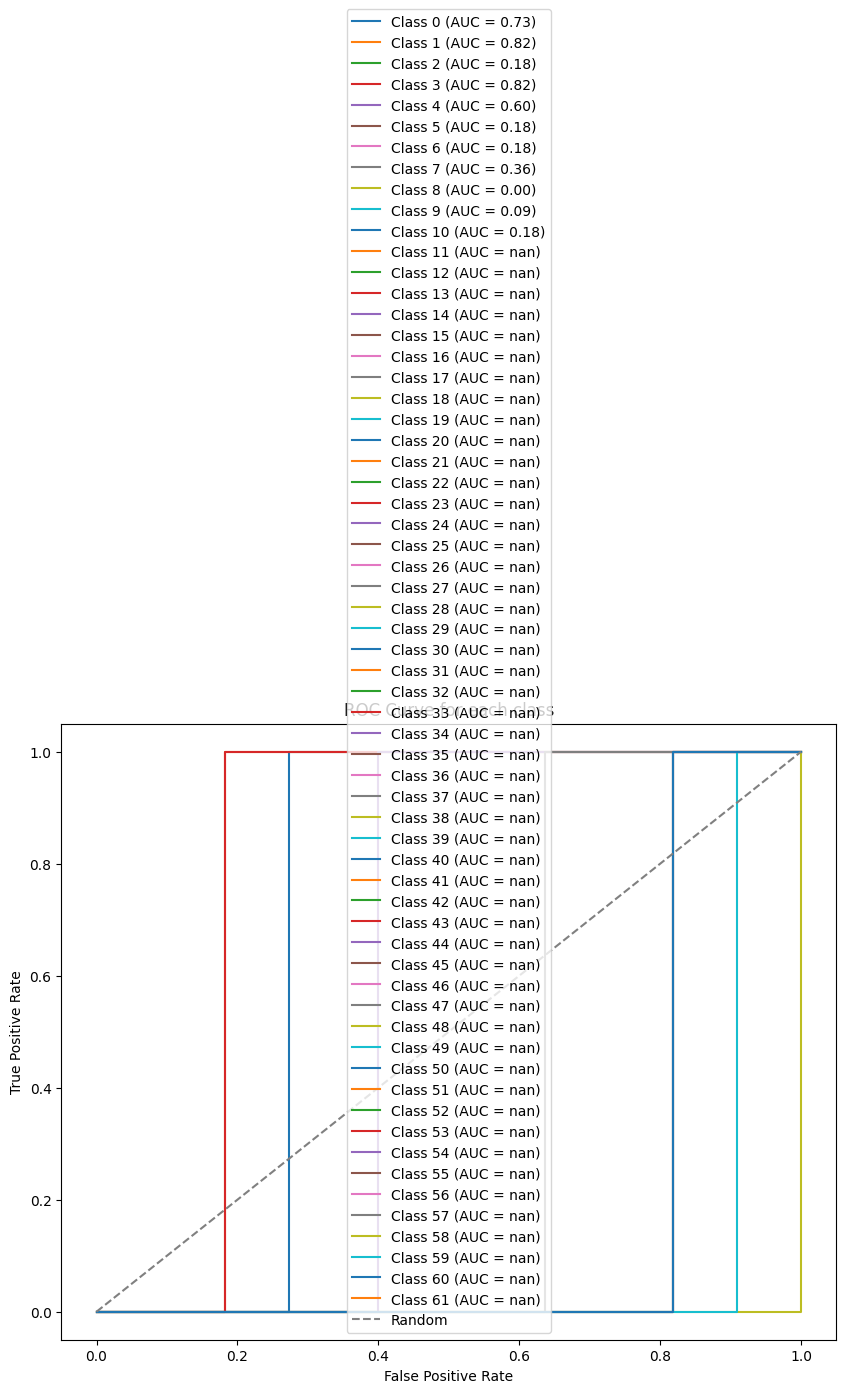

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to convert labels to one-hot encoding
def convert_to_one_hot(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

# Convert labels to one-hot encoding for training and test sets
train_labels_one_hot = convert_to_one_hot(training_data_frame.classes, 62)
test_labels_one_hot = convert_to_one_hot(test_data_frame.classes, 62)

# Predict probabilities for the test set
test_pred_prob = cnn.predict(test_data_frame)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(62):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()


1/1 [==============================] - 0s 198ms/step


C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\

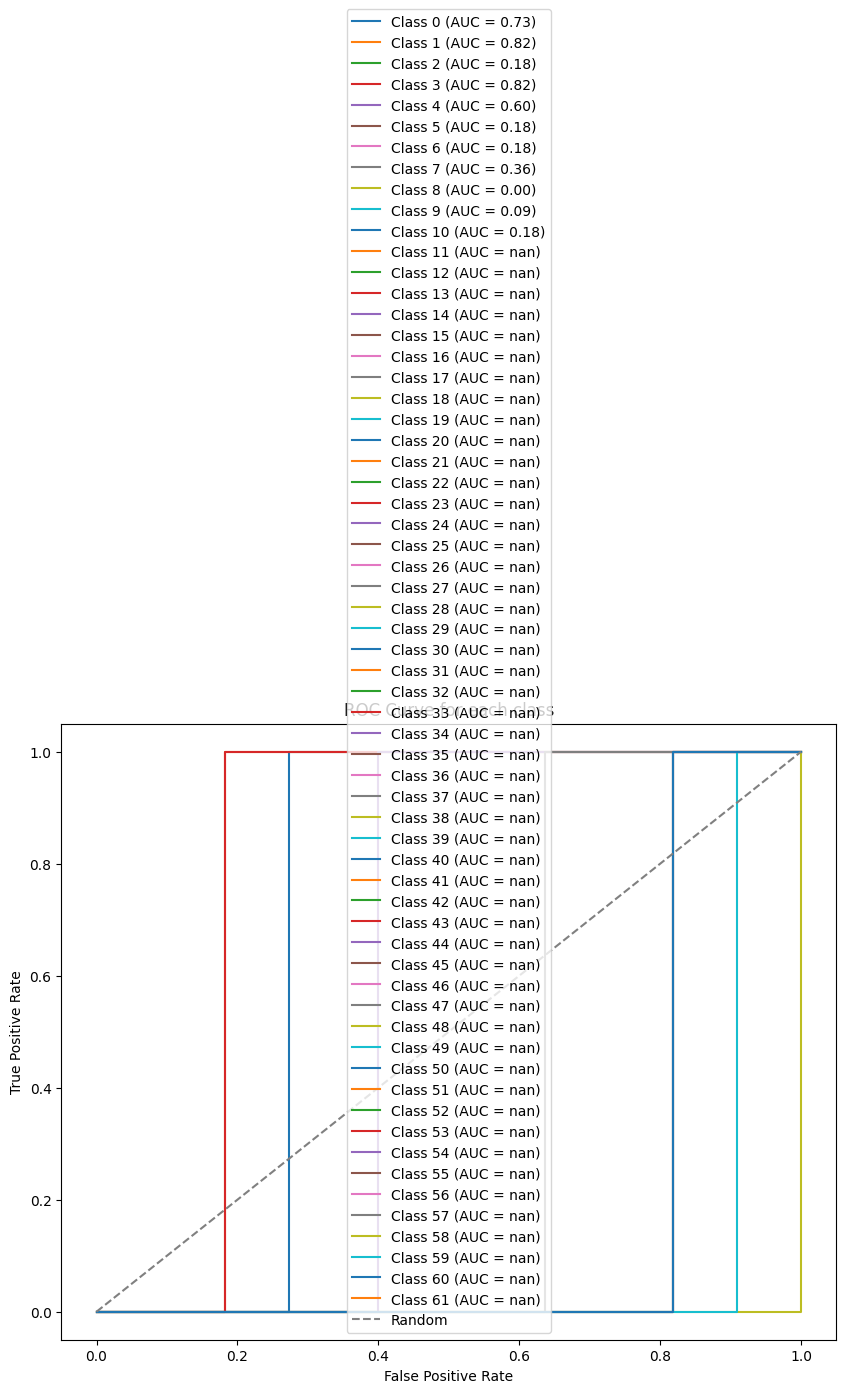

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def convert_to_one_hot(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i in range(len(labels)):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

# Convert labels to one-hot encoding for training and test sets
train_labels_one_hot = convert_to_one_hot(training_data_frame.classes, 62)
test_labels_one_hot = convert_to_one_hot(test_data_frame.classes, 62)

# Predict probabilities for the test set
test_pred_prob = cnn.predict(test_data_frame)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()


# Inference(s) from the Output
1. The model's accuracy changes every time as validation and testset images are picked at random. Random pick impacts the number of images available for each character in a training set
2. We can increase the training dataset images by adding distortions, image flips, zoom
3. Model's accuracy can be improved through updating image size we are feeding, it would also affect the model's speed
4. We can also experiment by varying 
    * the number of featues
    * kernel dimension
    * number of convolution
    * pooling layers
    * epochs count
    * fixing the learning rate

# Learning Outcomes

1. Construction of a Convolutional Neural Network (CNN) using the Keras library.
2. Experimenting with hyperparameters, such as learning rate and epochs, to optimize the performance of the models. These will help in assessing the error rates and accuracy to determine the effectiveness of different configurations.
3.  Drawing insights from model evaluations and comparing the performances.
4. Drawing Receiver Operating Characteristic (ROC) curves to evaluate the training and test accuracy/error of the models.
5. Understanding the performance characteristics of each model in the context of handwritten character recognition.